In [54]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
import spacy
from spacy import displacy


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varun\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
satp = pd.read_csv('../../data/cleaned_tokenized_satp.csv')
satp

,description,year,stripped_description,word_tokenized_description,sent_tokenized_description
0,"A Special Police Officer (SPO), identified as ...",2019.0,special police officer spo identified sameer a...,"['special', 'police', 'officer', 'spo', 'ident...",['special police officer spo identified sameer...
1,Armed Forces Special Powers Act (AFSPA) has be...,2019.0,armed force special power act afspa extended s...,"['armed', 'force', 'special', 'power', 'act', ...",['armed force special power act afspa extended...
2,"On January 1, an ex-United Liberation Front of...",2019.0,january 1 exunited liberation front asom ulfa ...,"['january', '1', 'exunited', 'liberation', 'fr...",['january 1 exunited liberation front asom ulf...
3,The number of objections filed on the draft of...,2019.0,number objection filed draft national register...,"['number', 'objection', 'filed', 'draft', 'nat...",['number objection filed draft national regist...
4,The Year 2019 will be challenging for the Odis...,2019.0,year 2019 challenging odisha police many impor...,"['year', '2019', 'challenging', 'odisha', 'pol...",['year 2019 challenging odisha police many imp...
...,...,...,...,...,...
5290,"Naga Students Federation (NSF) on December 31,...",2019.0,naga student federation nsf december 31 condem...,"['naga', 'student', 'federation', 'nsf', 'dece...",['naga student federation nsf december 31 cond...
5291,National Register of Citizens (NRC) officials ...,2019.0,national register citizen nrc official assam p...,"['national', 'register', 'citizen', 'nrc', 'of...",['national register citizen nrc official assam...
5292,"Naxalites [Left Wing Extremists, LWEs] set abl...",2019.0,naxalites left wing extremist lwes set ablaze ...,"['naxalites', 'left', 'wing', 'extremist', 'lw...",['naxalites left wing extremist lwes set ablaz...
5293,The Northeast Today reports that an official s...,2019.0,northeast today report official stated decembe...,"['northeast', 'today', 'report', 'official', '...",['northeast today report official stated decem...


In [4]:
spacy_pos_tagger = spacy.load("en_core_web_sm")

In [57]:
spacy_tags = spacy_pos_tagger(satp['description'][0])
print(spacy_tags)
for i in spacy_tags:
    print(i, "|", i.pos_,"|",spacy.explain(i.pos_),"|",i.tag_,spacy.explain(i.tag_))

A Special Police Officer (SPO), identified as Sameer Ahmad was killed by suspected militants at Hajan in Pulwama District on January 1 evening, reports Daily Excelsior. Sources said that suspected militants fired at Sameer Ahmad. The injured was immediately taken to a hospital where he was declared as brought dead, sources said. They said the militants managed to escape under the cover of darkness. Security forces were rushed and a search operation was launched to nab the attackers, they added
A | DET | determiner | DT determiner
Special | PROPN | proper noun | NNP noun, proper singular
Police | PROPN | proper noun | NNP noun, proper singular
Officer | PROPN | proper noun | NNP noun, proper singular
( | PUNCT | punctuation | -LRB- left round bracket
SPO | PROPN | proper noun | NNP noun, proper singular
) | PUNCT | punctuation | -RRB- right round bracket
, | PUNCT | punctuation | , punctuation mark, comma
identified | VERB | verb | VBN verb, past participle
as | SCONJ | subordinating co

In [58]:
displacy.serve(spacy_tags, style='dep')

C:\Users\varun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [6]:
# https://textblob.readthedocs.io/en/dev/quickstart.html#part-of-speech-tagging
blobs = [TextBlob(x) for x in satp['description']]
blobs[0]

TextBlob("A Special Police Officer (SPO), identified as Sameer Ahmad was killed by suspected militants at Hajan in Pulwama District on January 1 evening, reports Daily Excelsior. Sources said that suspected militants fired at Sameer Ahmad. The injured was immediately taken to a hospital where he was declared as brought dead, sources said. They said the militants managed to escape under the cover of darkness. Security forces were rushed and a search operation was launched to nab the attackers, they added")

In [42]:
tags0 = np.array(blobs[0].tags)
tags0[:,1]


array(['DT', 'JJ', 'NNP', 'NNP', 'NNP', 'VBN', 'IN', 'NNP', 'NNP', 'VBD',
       'VBN', 'IN', 'JJ', 'NNS', 'IN', 'NNP', 'IN', 'NNP', 'NNP', 'IN',
       'NNP', 'CD', 'NN', 'VBZ', 'NNP', 'NNP', 'NNS', 'VBD', 'IN', 'VBD',
       'NNS', 'VBN', 'IN', 'NNP', 'NNP', 'DT', 'NN', 'VBD', 'RB', 'VBN',
       'TO', 'DT', 'NN', 'WRB', 'PRP', 'VBD', 'VBN', 'IN', 'JJ', 'JJ',
       'NNS', 'VBD', 'PRP', 'VBD', 'DT', 'NNS', 'VBD', 'TO', 'VB', 'IN',
       'DT', 'NN', 'IN', 'NN', 'NN', 'NNS', 'VBD', 'VBN', 'CC', 'DT',
       'NN', 'NN', 'VBD', 'VBN', 'TO', 'VB', 'DT', 'NNS', 'PRP', 'VBD'],
      dtype='<U11')

In [8]:
blobs[0].noun_phrases

WordList(['spo', 'sameer ahmad', 'hajan', 'pulwama', 'january', 'excelsior', 'sources', 'sameer ahmad', 'security forces', 'search operation'])

In [9]:
blobs[0].sentiment

Sentiment(polarity=-0.010714285714285718, subjectivity=0.24285714285714285)

In [61]:

polarity = []
POS = []
subjectivity = []
b = []
for x in range(len(blobs)):
    polarity.append(blobs[x].sentiment[0])
    subjectivity.append(blobs[x].sentiment[1])
    POS.append(np.array(blobs[x].tags)[:,1])
    b.append(np.array(blobs[x].tags)[:,0])


print(len(polarity))
print(len(subjectivity))
print(len(POS))
print(len(b))



5295
5295
5295
5295


In [62]:
blobdf = pd.DataFrame({
    'textblob': b,
    'POS': POS,
    'polarity': polarity,
    'subjectivity': subjectivity
})

blobdf

,textblob,POS,polarity,subjectivity
0,"[A, Special, Police, Officer, SPO, identified,...","[DT, JJ, NNP, NNP, NNP, VBN, IN, NNP, NNP, VBD...",-0.010714,0.242857
1,"[Armed, Forces, Special, Powers, Act, AFSPA, h...","[NNP, NNP, NNP, NNP, NNP, NNP, VBZ, VBN, VBN, ...",0.069643,0.558929
2,"[On, January, 1, an, ex-United, Liberation, Fr...","[IN, NNP, CD, DT, JJ, NNP, NNP, IN, NNP, NNP, ...",0.068182,0.450000
3,"[The, number, of, objections, filed, on, the, ...","[DT, NN, IN, NNS, VBN, IN, DT, NN, IN, DT, NNP...",0.256944,0.511111
4,"[The, Year, 2019, will, be, challenging, for, ...","[DT, NN, CD, MD, VB, VBG, IN, DT, NNP, NNP, IN...",0.309524,0.678571
...,...,...,...,...
5290,"[Naga, Students, Federation, NSF, on, December...","[JJ, NNS, NNP, NNP, IN, NNP, CD, VBZ, VBN, DT,...",-0.098810,0.603571
5291,"[National, Register, of, Citizens, NRC, offici...","[NNP, NNP, IN, NNP, NNP, NNS, IN, NNP, VBP, VB...",0.088176,0.397741
5292,"[Naxalites, [, Left, Wing, Extremists, LWEs, ]...","[NNS, VBP, NNP, NNP, NNS, NNP, NNP, VBD, JJ, N...",0.033333,0.237500
5293,"[The, Northeast, Today, reports, that, an, off...","[DT, NNP, NNP, VBZ, IN, DT, JJ, VBN, IN, NNP, ...",0.080000,0.480000


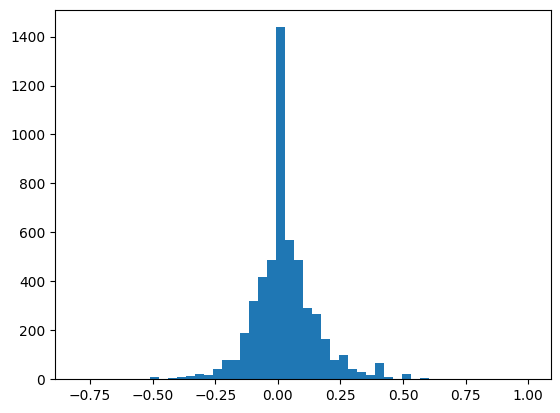

In [25]:
plt.hist(polarity, bins=50);